In [1]:
%matplotlib notebook
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# EX1:

In [3]:
#create data
x_data=np.random.rand(100).astype(np.float32)
y_data=x_data*0.1+0.3
print(x_data,'\n')
print(y_data)

[0.86723554 0.58580947 0.7084062  0.09691028 0.75672823 0.15763417
 0.565634   0.35550752 0.9982088  0.3820306  0.76565105 0.09891263
 0.7128965  0.6920846  0.645293   0.6400831  0.04105923 0.25496364
 0.19894809 0.78330034 0.60844237 0.25070268 0.82695746 0.6159475
 0.88330895 0.13807306 0.21523084 0.88661826 0.3885478  0.953582
 0.04824017 0.98951244 0.71843493 0.03267874 0.59479505 0.25786158
 0.20658584 0.17241417 0.45620555 0.5310319  0.8921078  0.9715283
 0.93034434 0.07423558 0.5512042  0.9359881  0.85282296 0.7766856
 0.74433386 0.12638123 0.37630764 0.8944214  0.83922285 0.83622986
 0.38110444 0.9734625  0.18464373 0.14181922 0.2697342  0.02140879
 0.10348997 0.527308   0.6490767  0.63100857 0.2637041  0.6387142
 0.18384911 0.23066491 0.17997955 0.830358   0.66157985 0.9418944
 0.48259738 0.19493921 0.08599138 0.35621744 0.68590695 0.9979932
 0.80040854 0.3800361  0.23806195 0.51699716 0.2593433  0.17513065
 0.9066239  0.00440867 0.57867795 0.13970862 0.6279529  0.37216607
 0.

In [4]:
#create tensorflow structure
Weights=tf.Variable(tf.random_uniform([1],-1.0,1.0))
biases=tf.Variable(tf.zeros([1]))

y=Weights*x_data+biases

loss=tf.reduce_mean(tf.square(y-y_data))

optimizer=tf.train.GradientDescentOptimizer(0.5)
train=optimizer.minimize(loss)

init=tf.global_variables_initializer()

In [6]:
sess=tf.Session()
sess.run(init)  #Very important 

for step in range(401):
    sess.run(train)
    if step%20==0:
        print(step,sess.run(Weights),sess.run(biases))

0 [0.49063405] [0.11835148]
20 [0.18076414] [0.25675046]
40 [0.11720278] [0.29078785]
60 [0.1036642] [0.29803783]
80 [0.10078046] [0.29958206]
100 [0.10016625] [0.299911]
120 [0.10003543] [0.29998103]
140 [0.10000756] [0.29999596]
160 [0.10000163] [0.29999915]
180 [0.10000036] [0.29999983]
200 [0.1000001] [0.29999995]
220 [0.1000001] [0.29999995]
240 [0.1000001] [0.29999995]
260 [0.1000001] [0.29999995]
280 [0.1000001] [0.29999995]
300 [0.1000001] [0.29999995]
320 [0.1000001] [0.29999995]
340 [0.1000001] [0.29999995]
360 [0.1000001] [0.29999995]
380 [0.1000001] [0.29999995]
400 [0.1000001] [0.29999995]


# session会话控制:

In [11]:
matrix1 = tf.constant([[3,3]])
matrix2= tf.constant([[2],
                                     [2]])
product=tf.matmul(matrix1,matrix2)#matrix mulitply np.dot(m1,m2)

#method 1
sess=tf.Session()
result=sess.run(product)
print(result)
sess.close()
result.shape

#method 2
with tf.Session() as sess:
    result2=sess.run(product)
    print(result2)

[[12]]
[[12]]


# Varible 变量：

In [16]:
state=tf.Variable(0,name='counter')
print(state.name)
one=tf.constant(1)
new_value=tf.add(state,one)
update=tf.assign(state,new_value)

init=tf.global_variables_initializer()  #must have if define varible
with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
            sess.run(update)
            print(sess.run(state))

counter_4:0
1
2
3


# placeholder传入值

In [28]:
input1=tf.placeholder(tf.float32)
input2=tf.placeholder(tf.float32)

output=tf.multiply(input1,input2)

with tf.Session() as sess:
    print(sess.run(output,feed_dict={input1:[7.],input2:[2.]}))

[14.]


# EX2:

<IPython.core.display.Javascript object>


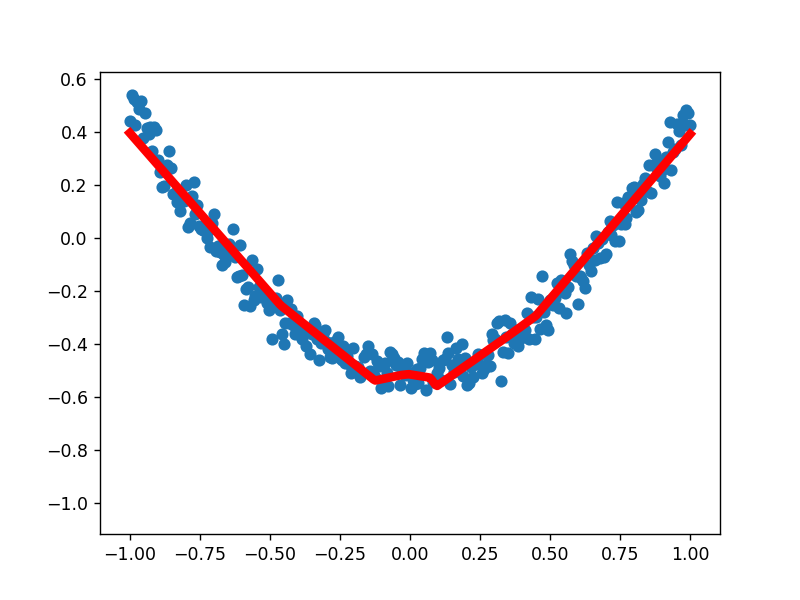

In [2]:
#add_layer function
def add_layer(inputs,in_size,out_size,activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    biases=tf.Variable(tf.zeros([1,out_size])+0.1)
    Wx_plus_b=tf.matmul(inputs,Weights)+biases
    if activation_function is None:
        outputs=Wx_plus_b
    else:
        outputs=activation_function(Wx_plus_b)
    return outputs

#initialize raining_data
x_data=np.linspace(-1,1,300)[:,np.newaxis]
noise=np.random.normal(0,0.05,x_data.shape)
y_data=np.square(x_data)-0.5+noise

#define placehold for inputs to network
xs=tf.placeholder(tf.float32,[None,1])
ys=tf.placeholder(tf.float32,[None,1])

#add hidden layer
l1=add_layer(xs,1,10,activation_function=tf.nn.relu)
#add output layer
predition=add_layer(l1,10,1,activation_function=None)

#the error between predition and real data
loss=tf.reduce_mean(tf.reduce_sum(tf.square(ys-predition),reduction_indices=[1]))
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)
init=tf.global_variables_initializer()

with tf.Session() as sess:
    #important step
    sess.run(init)
    
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.scatter(x_data,y_data)
    plt.ion()
    for step in range(1000):
        #trianing
        sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
        
        if step%50==0:
            #to see the step improvement
           # print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            predition_value=sess.run(predition,feed_dict={xs:x_data})
            
            lines=ax.plot(x_data,predition_value,'r-',lw=5)
            plt.pause(0.1)
    plt.ioff()
    plt.show()


# Tensorboard 可视化

In [2]:
#add_layer function
def add_layer(inputs,in_size,out_size,n_layer,activation_function=None):
    layer_name='layer%s' % n_layer
    with tf.name_scope(layer_name):
        
        with tf.name_scope('weights'):
            Weights = tf.Variable(tf.random_normal([in_size,out_size]),name='W')
            tf.summary.histogram(layer_name+'/weights',Weights)
            
        with tf.name_scope('biases'):
            biases=tf.Variable(tf.zeros([1,out_size])+0.1,name='b')
            tf.summary.histogram(layer_name+'/biases',biases)
            
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b=tf.matmul(inputs,Weights)+biases
            
        if activation_function is None:
            outputs=Wx_plus_b
        else:
            outputs=activation_function(Wx_plus_b)
            tf.summary.histogram(layer_name+'/outputs',outputs)
        
        return outputs
    
#initialize raining_data
x_data=np.linspace(-1,1,300)[:,np.newaxis]
noise=np.random.normal(0,0.05,x_data.shape)
y_data=np.square(x_data)-0.5+noise

#define placehold for inputs to network
with tf.name_scope('inputs'):
    xs=tf.placeholder(tf.float32,[None,1],name='x_input')
    ys=tf.placeholder(tf.float32,[None,1],name='y_input')

#add hidden layer
l1=add_layer(xs,1,10,n_layer=1,activation_function=tf.nn.relu)
#add output layer
predition=add_layer(l1,10,1,n_layer=2,activation_function=None)

#the error between predition and real data
with tf.name_scope('loss'):
    loss=tf.reduce_mean(tf.reduce_sum(tf.square(ys-predition),reduction_indices=[1]))
    tf.summary.scalar('loss',loss)
with tf.name_scope('train'):
    train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)
                   
init=tf.global_variables_initializer()

with tf.Session() as sess:
    merged=tf.summary.merge_all()
    writer=tf.summary.FileWriter('logs/',sess.graph)
    #important step
    sess.run(init)
    
    for step in range(1000):
        #trianing
        sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
        
        if step%50==0:
            
            result=sess.run(merged,feed_dict={xs:x_data,ys:y_data})
            writer.add_summary(result,step)